##Goals
###For company
Increase localization quality and set priorities for improvements based on app reviews.
###For Data team
Analyze apps reviews about localization quality on marketplaces like AppStore /GooglePlay / Steam

##Tasks

- Build an algorithm to determine whether a review is about localization or not.
- Build an algorithm to rank localization reviews from 1 to 5, where 1— very bad review and 5 — very good review.
- Build a dashboard for a business team.   
Include Localization reviews structure and dynamics based on ranking. 
Most frequent reasons for negative reviews

In [ ]:
import pandas as pd
import numpy as np
import re
import unicodedata

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stats=pd.read_excel('/content/drive/MyDrive/data/!stats.xlsx')
df1=pd.read_excel('/content/drive/MyDrive/data/REVIEWS_1.xlsx')
df2=pd.read_excel('/content/drive/MyDrive/data/REVIEWS_2.xlsx')

In [ ]:
def information(df):
  output=[]
  for col in df.columns:
    nonnull=len(df)-np.sum(pd.isna(df[col]))
    unique=df[col].nunique()
    coltype=str(df[col].dtype)
    output.append([col,nonnull,unique,coltype])
  output=pd.DataFrame(output)
  output.columns=['colName','non-null values', 'unique', 'dtype']
  return output

In [ ]:
information(stats)

,colName,non-null values,unique,dtype
0,ID,283,283,object
1,n in file1,283,47,int64
2,n in file2,283,210,int64
3,total,283,246,int64
4,Unnamed: 4,0,0,float64
5,Unnamed: 5,0,0,float64
6,Text reviews of PC titles are generally larger...,2,2,object


In [ ]:
information(df1)

,colName,non-null values,unique,dtype
0,ID,913763,38,object
1,Score/Recommendation,913763,6,int64
2,Text,913618,730263,object


In [ ]:
information(df2)

,colName,non-null values,unique,dtype
0,ID,956012,94,object
1,Score/Recommendation,956012,6,int64
2,Text,955940,680589,object


In [ ]:
df1.head()

,ID,Score/Recommendation,Text
0,title777,4,"Velmi návyková hra, skvěle zpracovaná. Jen ško..."
1,title777,4,"Hra hezká, vadí mi, že třeba přes noc se nepln..."
2,title777,5,Cool
3,title777,5,Suprová hra.
4,title777,5,"⚽️🏀🏈⚾️🥎去浏览器打开📲87ṚмＢ,C☻м📲华人最大娱乐站，开户免费送现金100块‼️-..."


In [ ]:
df2.head()

,ID,Score/Recommendation,Text
0,title776,1,العبه روعه تسليت وقت😘
1,title776,5,تطبيق جميلة
2,title776,5,واو
3,title776,5,حلوة
4,title776,5,Gg


In [ ]:
def filter_emoji(text):
    
    try:
        # Wide UCS-4 build
        myre = re.compile(u'['
                          u'\U0001F300-\U0001F64F'
                          u'\U0001F680-\U0001F6FF'
                          u'\u2600-\u2B55'
                          u'\u23cf'
                          u'\u23e9'
                          u'\u231a'
                          u'\u3030'
                          u'\ufe0f'
                          u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u'\U00010000-\U0010ffff'
                           u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
                           u'\U00002702-\U000027B0]+',     
                          re.UNICODE)
    except re.error:
        # Narrow UCS-2 build
        print('ee')
        myre =   re.compile(u'('
                                  u'\ud83c[\udf00-\udfff]|'
                                  u'\ud83d[\udc00-\ude4f]|'
                                  u'\uD83D[\uDE80-\uDEFF]|'
                                  u"(\ud83d[\ude00-\ude4f])|"  # emoticon
                                  u'[\u2600-\u2B55]|'
                                  u'[\u23cf]|'
                                  u'[\u1f918]|'
                                    u'[\u23e9]|'
                                  u'[\u231a]|'
                                  u'[\u3030]|'
                                  u'[\ufe0f]|'
                                  u'\uD83D[\uDE00-\uDE4F]|'
                                  u'\uD83C[\uDDE0-\uDDFF]|'
                                u'[\u2702-\u27B0]|'
                                  u'\uD83D[\uDC00-\uDDFF])+',
                                  re.UNICODE)
    return(myre.sub(' ', text))
    #print(text)

In [ ]:
df1['Text']=df1['Text'].astype(str)
df1['filtered']=df1['Text'].apply(lambda x:filter_emoji(x))

In [ ]:
df1.head()

,ID,Score/Recommendation,Text,filtered
0,title777,4,"Velmi návyková hra, skvěle zpracovaná. Jen ško...","Velmi návyková hra, skvěle zpracovaná. Jen ško..."
1,title777,4,"Hra hezká, vadí mi, že třeba přes noc se nepln...","Hra hezká, vadí mi, že třeba přes noc se nepln..."
2,title777,5,Cool,Cool
3,title777,5,Suprová hra.,Suprová hra.
4,title777,5,"⚽️🏀🏈⚾️🥎去浏览器打开📲87ṚмＢ,C☻м📲华人最大娱乐站，开户免费送现金100块‼️-...","去浏览器打开 87ṚмＢ,C м 华人最大娱乐站，开户免费送现金100块‼ --国际监管，..."


In [ ]:
df2['Text']=df2['Text'].astype(str)
df2['filtered']=df2['Text'].apply(lambda x:filter_emoji(x))
df2.head()

,ID,Score/Recommendation,Text,filtered
0,title776,1,العبه روعه تسليت وقت😘,العبه روعه تسليت وقت
1,title776,5,تطبيق جميلة,تطبيق جميلة
2,title776,5,واو,واو
3,title776,5,حلوة,حلوة
4,title776,5,Gg,Gg


In [ ]:
keywords=pd.read_excel('/content/drive/MyDrive/data/Keywords.xlsx')

In [ ]:
keywords.head()

,Language combination,"""Translation""","""Language""","""Localization""","""English""",Language,Unnamed: 6,ISO 639-1,ISO 3166-1-alpha-2,Unnamed: 9
0,English - French,Traduction,la langue,localisation,anglais,Français,NaN,FR,FR,NaN
1,English - German,Übersetzung,Sprache,Lokalisierung,Englisch,Deutsch,NaN,DE,DE,NaN
2,English - Italian,traduzione,lingua,localizzazione,inglese,Italiano,NaN,IT,IT,NaN
3,English - Spanish,traducción,idioma,localización,inglés,español,NaN,ES,ES,NaN
4,English - Chinese Simplified,翻译,语言,本土化,英语,中国,NaN,ZH,CN,NaN


In [ ]:
keywords.columns

Index(['Language combination', '"Translation"', '"Language"', '"Localization"',
       '"English"', 'Language', 'Unnamed: 6', 'ISO 639-1',
       'ISO 3166-1-alpha-2', 'Unnamed: 9'],
      dtype='object')

In [ ]:
for col in ['Language combination', '"Translation"', '"Language"', '"Localization"',
       '"English"', 'Language', 'ISO 639-1',
       'ISO 3166-1-alpha-2']:
  keywords[col]=keywords[col].str.casefold()

In [ ]:
keywords[['Language combination', '"Translation"', '"Language"', '"Localization"',
       '"English"', 'Language']].head()

,Language combination,"""Translation""","""Language""","""Localization""","""English""",Language
0,english - french,traduction,la langue,localisation,anglais,français
1,english - german,übersetzung,sprache,lokalisierung,englisch,deutsch
2,english - italian,traduzione,lingua,localizzazione,inglese,italiano
3,english - spanish,traducción,idioma,localización,inglés,español
4,english - chinese simplified,翻译,语言,本土化,英语,中国


In [ ]:
keys = ['翻译', '语言', '中文',  '中国',  '汉语', '本土化', '英语', '版本',
        '区域', '跨地区', '地区','华语', '汉化', '英文', '国家', '国服', 'VPN','vpn']

In [ ]:
langlist=[]
for i in keywords.index:
  langlist+=list(keywords.loc[i,['"Translation"', '"Language"', '"Localization"',
       '"English"', 'Language']].values)
  
langlist=langlist+keys  
print(langlist)

['traduction', 'la langue', 'localisation', 'anglais', 'français', 'übersetzung', 'sprache', 'lokalisierung', 'englisch', 'deutsch', 'traduzione', 'lingua', 'localizzazione', 'inglese', 'italiano', 'traducción', 'idioma', 'localización', 'inglés', 'español', '翻译', '语言', '本土化', '英语', '中国', '翻譯', '語言', '本土化', '英語', '中國', '翻訳', '言語', '局地化', '英語', '日本', '번역', '언어', '지방화', '영어', '한국', 'tradução', 'língua', 'localização', 'inglês', 'portugues', 'tradução', 'língua', 'localização', 'inglês', 'portugues', 'tłumaczenie', 'język', 'lokalizacja', 'angielski', 'polski', ' çeviri ', ' dil ', 'yerelleştirme', 'i̇ngilizce', 'türk', 'ترجمة', 'لغة', 'الموقع', 'الإنجليزية', 'العربية', 'перевод ', 'язык', 'локализация', 'английский', 'русский', 'vertaling', ' taal ', 'lokalisatie', 'engels', 'nederlands', 'översättning', 'språk', 'lokalisering', 'engelska', 'svenska', 'oversættelse', 'sprog', 'lokalisering', 'engelsk', 'dansk', 'překlad', 'jazyk', 'lokalizace', 'anglický ', 'česky', 'käännös', 'kieli', '

In [ ]:
for i,key in enumerate(langlist):
  langlist[i]=str(key).strip()

print(langlist)  

['traduction', 'la langue', 'localisation', 'anglais', 'français', 'übersetzung', 'sprache', 'lokalisierung', 'englisch', 'deutsch', 'traduzione', 'lingua', 'localizzazione', 'inglese', 'italiano', 'traducción', 'idioma', 'localización', 'inglés', 'español', '翻译', '语言', '本土化', '英语', '中国', '翻譯', '語言', '本土化', '英語', '中國', '翻訳', '言語', '局地化', '英語', '日本', '번역', '언어', '지방화', '영어', '한국', 'tradução', 'língua', 'localização', 'inglês', 'portugues', 'tradução', 'língua', 'localização', 'inglês', 'portugues', 'tłumaczenie', 'język', 'lokalizacja', 'angielski', 'polski', 'çeviri', 'dil', 'yerelleştirme', 'i̇ngilizce', 'türk', 'ترجمة', 'لغة', 'الموقع', 'الإنجليزية', 'العربية', 'перевод', 'язык', 'локализация', 'английский', 'русский', 'vertaling', 'taal', 'lokalisatie', 'engels', 'nederlands', 'översättning', 'språk', 'lokalisering', 'engelska', 'svenska', 'oversættelse', 'sprog', 'lokalisering', 'engelsk', 'dansk', 'překlad', 'jazyk', 'lokalizace', 'anglický', 'česky', 'käännös', 'kieli', 'lokaliso

In [ ]:
re.sub(r'[^\w\s]',' ',unicodedata.normalize('NFKD','и́')).strip().casefold()  #==unicodedata.normalize('NFKD','и́').casefold()

'и'

In [ ]:
re.sub(r'[\W\d]',' ',unicodedata.normalize('NFKD','שָׂפָה')).encode('ascii', 'ignore').decode('ascii')

'   '

In [ ]:
'שָׂפָה'.isalpha()

False

In [ ]:
langlist.remove('nan')
print(langlist)

['traduction', 'la langue', 'localisation', 'anglais', 'français', 'übersetzung', 'sprache', 'lokalisierung', 'englisch', 'deutsch', 'traduzione', 'lingua', 'localizzazione', 'inglese', 'italiano', 'traducción', 'idioma', 'localización', 'inglés', 'español', '翻译', '语言', '本土化', '英语', '中国', '翻譯', '語言', '本土化', '英語', '中國', '翻訳', '言語', '局地化', '英語', '日本', '번역', '언어', '지방화', '영어', '한국', 'tradução', 'língua', 'localização', 'inglês', 'portugues', 'tradução', 'língua', 'localização', 'inglês', 'portugues', 'tłumaczenie', 'język', 'lokalizacja', 'angielski', 'polski', 'çeviri', 'dil', 'yerelleştirme', 'i̇ngilizce', 'türk', 'ترجمة', 'لغة', 'الموقع', 'الإنجليزية', 'العربية', 'перевод', 'язык', 'локализация', 'английский', 'русский', 'vertaling', 'taal', 'lokalisatie', 'engels', 'nederlands', 'översättning', 'språk', 'lokalisering', 'engelska', 'svenska', 'oversættelse', 'sprog', 'lokalisering', 'engelsk', 'dansk', 'překlad', 'jazyk', 'lokalizace', 'anglický', 'česky', 'käännös', 'kieli', 'lokaliso

###Filtering Localization Reviews based on Keywords

In [ ]:
def findWholeWord(text):
    text=unicodedata.normalize('NFKD',text)
    c=0
    for w in langlist:
      match = re.compile(r'\b({0})\b'.format(unicodedata.normalize('NFKD',w)), flags=re.IGNORECASE)
      c = c + bool(re.search(match,text))*1
    if c ==  0:
      return 0
    return 1  
#print(findWholeWord('seek')('those who seek shall find'))    # -> <match object>
#print(findWholeWord('word')('swordsmith'))                   # -> None

In [ ]:
df1['filtered']=df1['filtered'].str.casefold()
df1['loc']=df1['filtered'].apply(findWholeWord)

In [ ]:
df1['loc'].sum()

5883

In [ ]:
df2['loc'] = df2['filtered'].str.casefold().apply(findWholeWord)
df2['loc'].sum()

6784

In [ ]:
dfloc=pd.concat([df1[df1['loc']==1],df2[df2['loc']==1]],ignore_index=True)
len(dfloc)

12667

In [ ]:
pip install langdetect

     |████████████████████████████████| 983kB 7.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=ed72eedf1875b87053cf882bc5770648367ef529968c7ff1a6e7a736a256d391
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [ ]:
dfloc['lang']=dfloc['filtered'].apply(lambda x: detect(x))

In [ ]:
dfloc['lang'].value_counts()

tr       2087
en       1816
fr       1388
id       1188
it       1105
ru        806
de        752
ar        695
vi        629
es        600
pt        431
pl        283
tl        272
nl        166
ko        125
cs         50
th         49
zh-cn      34
af         30
no         25
sv         23
da         18
et         12
ro         11
so         10
el          8
ca          8
he          6
sw          6
sk          5
cy          5
zh-tw       4
ja          4
hr          3
bg          2
sl          2
fi          2
sq          2
hu          2
mk          1
uk          1
hi          1
Name: lang, dtype: int64

In [ ]:
keywords.columns

Index(['Language combination', '"Translation"', '"Language"', '"Localization"',
       '"English"', 'Language', 'Unnamed: 6', 'ISO 639-1',
       'ISO 3166-1-alpha-2', 'Unnamed: 9'],
      dtype='object')

In [ ]:
re.split('english - ','english - english')

['', 'english']

In [ ]:
keywords[0:29][['Language combination','ISO 639-1']]

,Language combination,ISO 639-1
0,english - french,fr
1,english - german,de
2,english - italian,it
3,english - spanish,es
4,english - chinese simplified,zh
5,english - chinese traditional,zh
6,english - japanese,ja
7,english - korean,ko
8,english - portuguese (brz),pt
9,english - portuguese (eur),pt


In [ ]:
langdict={}
for comb, code in keywords[0:29][['Language combination','ISO 639-1']].values:
   #print(code,comb)
   langdict[str(code).lower()]=re.split('english - ',str(comb))[1]

#keywords[['Language combination','ISO 639-1']].apply(lambda x,y : langdict[y].append(x), axis=1)

In [ ]:
langdict

{'ar': 'arabic',
 'cs': 'czech ',
 'da': 'danish',
 'de': 'german',
 'el': 'greek',
 'en': 'english',
 'es': 'spanish',
 'fi': 'finnish',
 'fr': 'french',
 'he': 'hebrew',
 'hi': 'hindi',
 'id': 'indonesian',
 'is': 'icelandic',
 'it': 'italian',
 'ja': 'japanese',
 'ko': 'korean',
 'ms': 'malayan',
 'nl': 'dutch',
 'no': 'norwegian',
 'pl': 'polish',
 'pt': 'portuguese (eur)',
 'ru': 'russian',
 'sv': 'swedish',
 'th': 'thai',
 'tr': 'turkish',
 'vi': 'vietnamese',
 'zh': 'chinese traditional'}

In [ ]:
for i in set(dfloc['lang'].value_counts().index):
  if i not in langdict:
    langdict[i]=i

In [ ]:
langdict['zh']='Chinese'
#langdict['tl']='Tagalog'
langdict['zh-cn']='Chinese'
# langdict['cy']='cy'
# langdict['sw']='sw'

In [ ]:
dfloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12667 entries, 0 to 12666
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    12667 non-null  object
 1   Score/Recommendation  12667 non-null  int64 
 2   Text                  12667 non-null  object
 3   filtered              12667 non-null  object
 4   loc                   12667 non-null  int64 
 5   lang                  12667 non-null  object
dtypes: int64(2), object(4)
memory usage: 593.9+ KB


In [ ]:
dfloc['lang_name']=dfloc['lang'].apply(lambda x:langdict[x])

In [ ]:
dfloc1=dfloc[~dfloc['Text'].isna()]

In [ ]:
dfloc1.loc[790,'Text']

'Le mettre en français se serai cool'

In [ ]:
# dfloc1[dfloc1['lang_name']=='Tagalog']['Text']
# dfloc1.loc[3321,'lang']='hi'
# i=[790,886,1193]
# dfloc1.loc[1415,'lang']='ms'
# dfloc1.loc[1415,'lang']

In [ ]:
dfloc1['lang_name'].value_counts()

turkish             2087
english             1816
french              1388
indonesian          1188
italian             1105
russian              806
german               752
arabic               695
vietnamese           629
spanish              600
portuguese (eur)     431
polish               283
tl                   272
dutch                166
korean               125
czech                 50
thai                  49
Chinese               34
af                    30
norwegian             25
swedish               23
danish                18
et                    12
ro                    11
so                    10
ca                     8
greek                  8
sw                     6
hebrew                 6
sk                     5
cy                     5
japanese               4
zh-tw                  4
hr                     3
hu                     2
sq                     2
bg                     2
finnish                2
sl                     2
mk                     1


In [ ]:
dfloc1.reset_index(inplace=True)

In [ ]:
dfloc1.to_csv('filtered_reviews_normalized.csv', index = False)

In [ ]:
from google.colab import files
files.download("filtered_reviews_normalized.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Translating Reviews about Localization

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/filtered_reviews_normalized.csv',engine='python')

In [ ]:
def information(df):
  output=[]
  for col in df.columns:
    nonnull=len(df)-np.sum(pd.isna(df[col]))
    unique=df[col].nunique()
    coltype=str(df[col].dtype)
    output.append([col,nonnull,unique,coltype])
  output=pd.DataFrame(output)
  output.columns=['colName','non-null values', 'unique', 'dtype']
  return output

In [ ]:
information(df)

,colName,non-null values,unique,dtype
0,index,12667,12667,int64
1,ID,12667,117,object
2,Score/Recommendation,12667,6,int64
3,Text,12450,12110,object
4,filtered,12449,12117,object
5,loc,12667,1,int64
6,lang,12667,42,object
7,lang_name,12667,42,object


In [ ]:
df.loc[df['lang']=='en','Text']

4                               Use VPN to run the game👍👍👍
8        Wonderful Game! I love the concept of rts + fp...
9        What if you open it and flash back? (WIN10)\nA...
10       ----------------------------------------------...
11       Played a lot of this on the Switch, and boy do...
                               ...                        
12557    Can't even connect to the firsr playable area....
12607                             I want language thailand
12612    (Español) Su juego esta increible pero me gust...
12654    This is the best game if you are English then ...
12666    I really like this game but they should update...
Name: Text, Length: 1816, dtype: object

In [ ]:
def lenstr(text):
  return len(text)

df['lenstr']=df['filtered'].astype('str').apply(lenstr)
df.loc[4,'lenstr']

24

In [ ]:
df['lenstr'].max()

32239

In [ ]:
df['lenstr'].argmax()

10876

In [ ]:
df.loc[10876]

index                                                               10876
ID                                                               title898
Score/Recommendation                                                    5
Text                    kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk...
filtered                kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk...
loc                                                                     1
lang                                                                   fr
lang_name                                                          french
lenstr                                                              32239
Name: 10876, dtype: object

In [ ]:
df['filtered']=df['filtered'].astype(str)
df['filtered']=df['filtered'].str.casefold()

In [ ]:
def isNotBlank (myString):
    return bool(myString and myString.strip())

df['isnotblank']=df['filtered'].apply(isNotBlank)
df['isnotblank']=df['isnotblank']*1

In [ ]:
df['isnotblank'].sum()

12667

No empty strings

In [ ]:
keywords=pd.read_excel('/content/drive/MyDrive/data/Keywords.xlsx')

In [ ]:
for col in ['Language combination', '"Translation"', '"Language"', '"Localization"',
       '"English"', 'Language', 'ISO 639-1','ISO 3166-1-alpha-2']:
  keywords[col]=keywords[col].str.casefold()

keys = ['翻译', '语言', '中文',  '中国',  '汉语', '本土化', '英语', '版本',
        '区域', '跨地区', '地区','华语', '汉化', '英文', '国家', '国服', 'VPN','vpn']

langlist=[]
for i in keywords.index:
  langlist+=list(keywords.loc[i,['"Translation"', '"Language"', '"Localization"','"English"', 'Language']].values)
  
langlist=langlist+keys 

for i,key in enumerate(langlist):
  langlist[i]=str(key).strip()

langlist.remove('nan')
print(langlist)

['traduction', 'la langue', 'localisation', 'anglais', 'français', 'übersetzung', 'sprache', 'lokalisierung', 'englisch', 'deutsch', 'traduzione', 'lingua', 'localizzazione', 'inglese', 'italiano', 'traducción', 'idioma', 'localización', 'inglés', 'español', '翻译', '语言', '本土化', '英语', '中国', '翻譯', '語言', '本土化', '英語', '中國', '翻訳', '言語', '局地化', '英語', '日本', '번역', '언어', '지방화', '영어', '한국', 'tradução', 'língua', 'localização', 'inglês', 'portugues', 'tradução', 'língua', 'localização', 'inglês', 'portugues', 'tłumaczenie', 'język', 'lokalizacja', 'angielski', 'polski', 'çeviri', 'dil', 'yerelleştirme', 'i̇ngilizce', 'türk', 'ترجمة', 'لغة', 'الموقع', 'الإنجليزية', 'العربية', 'перевод', 'язык', 'локализация', 'английский', 'русский', 'vertaling', 'taal', 'lokalisatie', 'engels', 'nederlands', 'översättning', 'språk', 'lokalisering', 'engelska', 'svenska', 'oversættelse', 'sprog', 'lokalisering', 'engelsk', 'dansk', 'překlad', 'jazyk', 'lokalizace', 'anglický', 'česky', 'käännös', 'kieli', 'lokaliso

In [ ]:
def splitdata(text):
  flist=[]
  #extratext=[]
  #l=0
  for w in langlist:
    for string in text.split("."):
      #text=unicodedata.normalize('NFKD','guzel ama turkce dıl destegıde olsun..')
      match = re.compile(r'\b{0}\b'.format(unicodedata.normalize('NFKD',w)), flags=re.IGNORECASE)
      if re.search(match,unicodedata.normalize('NFKD',string)):
        #l+=len(string)
        #while l<5000:
        if unicodedata.normalize('NFKD',string) not in unicodedata.normalize('NFKD',flist):
          flist.append(string)
        #else:
          #extratext.append(string)
         
  return '.'.join(flist) #, ' '.join(extratext)




In [ ]:

df['shorttext']=df['filtered'].apply(lambda x:splitdata(x))


In [ ]:
print(df['Text'].dtype)
print(df['shorttext'].dtype)

object
object


In [ ]:
df['len_shorttext']=df['shorttext'].apply(lambda x: len(x))

In [ ]:
#df.loc[3806]

In [ ]:
longtext=df['len_shorttext'].sort_values(ascending=False).reset_index().head(2)['index']
#head(18)['index']

In [ ]:
pip install deep-translator

In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
def translate(text):
  translated = GoogleTranslator(source='auto', target='english').translate(text)                 
  return translated

In [ ]:
df.loc[~df.index.isin(longtext)].nunique() 

index                   12665
ID                        117
Score/Recommendation        6
Text                    12108
filtered                12011
loc                         1
lang                       42
lang_name                  42
shorttext               11881
len_shorttext             795
dtype: int64

In [ ]:
df['translated_text']=df.loc[~df.index.isin(longtext),'shorttext'].apply(translate)

In [ ]:
df.to_csv('translated_reviews.csv',index=False)
from google.colab import files
files.download("translated_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification of Reviews

In [ ]:
import pandas as pd
import numpy as np
import re
import unicodedata
import spacy
import gensim
from gensim import corpora

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/translated_reviews.csv',engine='python')

In [ ]:
df.head()

,index,ID,Score/Recommendation,Text,filtered,loc,lang,lang_name,isnotblank,shorttext,len_shorttext,translated_text
0,0,title777,5,Excellent en français et connexion Facebook sa...,excellent en français et connexion facebook sa...,1,fr,french,1,excellent en français et connexion facebook sa...,52,excellent in French and facebook connection wi...
1,1,title777,5,Muito viciante! Amei. Só achei ruim a demora p...,muito viciante! amei. só achei ruim a demora p...,1,pt,portuguese (eur),1,não colocaram o idioma em português,36,did not put the language in Portuguese
2,2,title777,3,Super ciężka gra... 😐 Ale za to fajna bardzo p...,super ciężka gra... ale za to fajna bardzo p...,1,pl,polish,1,ale za to fajna bardzo proszę o język polsk...,183,"but nice, I am asking for the Polish language,..."
3,3,title777,4,Naprawdę fajna gra jak na nową grę :) jednak c...,naprawdę fajna gra jak na nową grę :) jednak c...,1,pl,polish,1,naprawdę fajna gra jak na nową grę :) jednak c...,173,really cool game for a new game :) but I would...
4,4,title178,5,Use VPN to run the game👍👍👍,use vpn to run the game,1,en,english,1,use vpn to run the game use vpn to run the game,49,use vpn to run the game use vpn to run the game


In [ ]:
df.loc[3,'translated_text']

'really cool game for a new game :) but I would like the developers to add Polish really cool game for a new game :) but I would like the creators to add Polish'

In [ ]:
df['translated_text']=df['translated_text'].astype(str)
df['translated_text']=df['translated_text'].str.casefold()

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def blob(text):
  test=TextBlob(text)
  p=test.sentiment.polarity
  
  return p #test.sentiment

In [ ]:
df['polarity']=df['translated_text'].apply(blob)

In [ ]:
df.head()

,index,ID,Score/Recommendation,Text,filtered,loc,lang,lang_name,isnotblank,shorttext,len_shorttext,translated_text,polarity
0,0,title777,5,Excellent en français et connexion Facebook sa...,excellent en français et connexion facebook sa...,1,fr,french,1,excellent en français et connexion facebook sa...,52,excellent in french and facebook connection wi...,0.500000
1,1,title777,5,Muito viciante! Amei. Só achei ruim a demora p...,muito viciante! amei. só achei ruim a demora p...,1,pt,portuguese (eur),1,não colocaram o idioma em português,36,did not put the language in portuguese,0.000000
2,2,title777,3,Super ciężka gra... 😐 Ale za to fajna bardzo p...,super ciężka gra... ale za to fajna bardzo p...,1,pl,polish,1,ale za to fajna bardzo proszę o język polsk...,183,"but nice, i am asking for the polish language,...",-0.147222
3,3,title777,4,Naprawdę fajna gra jak na nową grę :) jednak c...,naprawdę fajna gra jak na nową grę :) jednak c...,1,pl,polish,1,naprawdę fajna gra jak na nową grę :) jednak c...,173,really cool game for a new game :) but i would...,0.037273
4,4,title178,5,Use VPN to run the game👍👍👍,use vpn to run the game,1,en,english,1,use vpn to run the game use vpn to run the game,49,use vpn to run the game use vpn to run the game,-0.400000


In [ ]:
df['polarity']=df['polarity'].astype(float)

In [ ]:
df['sentiment']=''
df.loc[df.polarity>0,'sentiment']='positive'
df.loc[df.polarity==0,'sentiment']='neutral'
df.loc[df.polarity<0,'sentiment']='negative'

In [ ]:
df['sentiment'].value_counts()/len(df)

positive    0.417621
neutral     0.360385
negative    0.221994
Name: sentiment, dtype: float64

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 4.4MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df['compound']=df['translated_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
df['vader_sentiment']=''
df.loc[df.compound>0,'vader_sentiment']='positive'
df.loc[df.compound==0,'vader_sentiment']='neutral'
df.loc[df.compound<0,'vader_sentiment']='negative'


In [ ]:
df['vader_sentiment'].value_counts()/len(df)

positive    0.605037
neutral     0.218047
negative    0.176916
Name: vader_sentiment, dtype: float64

In [ ]:
df[df['sentiment']!=df['vader_sentiment']]['translated_text']

2        but nice, i am asking for the polish language,...
4         use vpn to run the game  use vpn to run the game
6               great game unfortunately but not in german
8        its not my native language :) \nsry if my engl...
10       comes in english or japanese, but the japanese...
                               ...                        
12647    we will rate this game as game number 14 in in...
12656    you pay attention to the developer there it sa...
12660                          good game but no vietnamese
12662                          it very good - fake english
12666    i really like this game but they should update...
Name: translated_text, Length: 4843, dtype: object

In [ ]:
df.loc[12666,['sentiment','vader_sentiment','polarity','compound','translated_text']]

sentiment                                                   negative
vader_sentiment                                             positive
polarity                                                        -0.1
compound                                                      0.2255
translated_text    i really like this game but they should update...
Name: 12666, dtype: object

After manually reviewing some of the reviews, it seems TextBlob does a better job at identifying positive and negative reviews in context of localisation.

In [ ]:
dfneg=df[(df['sentiment']=='negative') | (df['vader_sentiment']=='negative')]

In [ ]:
dfneg['cleaned_text'] = dfneg['translated_text'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
#df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in dfneg['cleaned_text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [ ]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

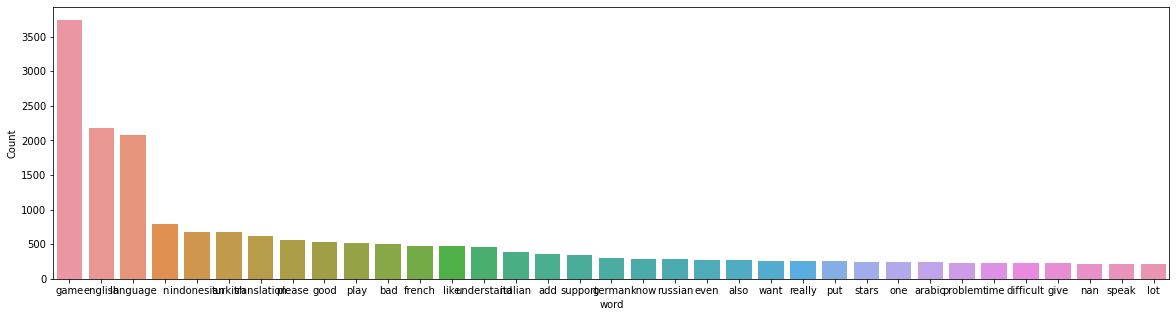

In [ ]:
freq_words(reviews, 35)

In [ ]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc])
       return output

In [ ]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
#print(tokenized_reviews[1])

In [ ]:
reviews_2 = lemmatization(tokenized_reviews)
#print(reviews_2[1]) # print lemmatized review

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


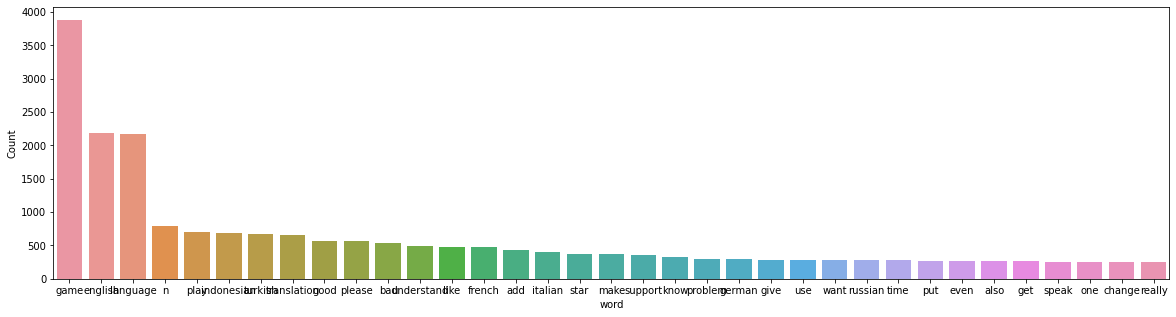

In [ ]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

dfneg['cleaned_text'] = reviews_3

freq_words(dfneg['cleaned_text'], 35)

In [ ]:
dictionary = corpora.Dictionary(reviews_2)

In [ ]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]


In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=30, random_state=100,
                chunksize=1000, passes=50)

In [ ]:
lda_model.print_topics()

[(15,
  '0.040*"buy" + 0.040*"less" + 0.030*"player" + 0.025*"nah" + 0.024*"mission" + 0.020*"experience" + 0.020*"absolutely" + 0.020*"quality" + 0.017*"complain" + 0.017*"require"'),
 (12,
  '0.132*"german" + 0.113*"russian" + 0.064*"game" + 0.060*"english" + 0.045*"everything" + 0.029*"shame" + 0.026*"one" + 0.024*"always" + 0.024*"year" + 0.024*"language"'),
 (21,
  '0.084*"game" + 0.067*"spanish" + 0.066*"language" + 0.059*"vietnamese" + 0.058*"not" + 0.052*"translate" + 0.050*"can" + 0.032*"play" + 0.032*"thing" + 0.030*"miss"'),
 (1,
  '0.091*"first" + 0.061*"english" + 0.047*"mistake" + 0.043*"suck" + 0.034*"enough" + 0.025*"send" + 0.025*"happen" + 0.024*"button" + 0.020*"often" + 0.020*"grammar"'),
 (16,
  '0.108*"use" + 0.088*"game" + 0.065*"language" + 0.058*"word" + 0.042*"english" + 0.030*"try" + 0.027*"enter" + 0.022*"time" + 0.021*"play" + 0.020*"foreign"'),
 (6,
  '0.061*"chinese" + 0.056*"game" + 0.042*"every" + 0.035*"find" + 0.033*"friend" + 0.025*"ok" + 0.024*"open

LDA gives names of certain languages like russian, indonesian, french, portugese and also words like voice, language, problem. And since the model was build only on negative classified reviews which had only sentences containing keywords about localisation. We can say that the problem is the localisation from or to these languages.

What else we can try: We can try changing the thresholds for classifying reviews as postive, negative or neutral and see what topics are removed or added to the topics. 